## Transposition / Enharmonic Variant

Both the displayed and the payback pitch can be set independently from the note/chord pitch. 

* **Displayed Pitch**: The displayed pitch, being a notation, can be set via `.addSymbol(symbols.NotatedPitch(...))` or `.addSymbol(symbols.Transpose(...))`. 
* **Playback Pitch**: This can be set via `.setPlay(transpose=...)`


In [1]:
from maelzel.core import *

5D#:1♩
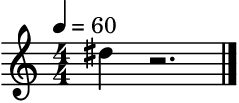

In [2]:
n = Note("5Eb", 1)
n

5D# (5Eb):1♩:symbols=[NotatedPitch(pitch=5Eb)]
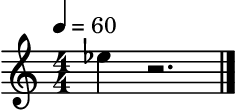

In [3]:
n = Note("5D#", 1).addSymbol(symbols.NotatedPitch("5Eb"))
n

There is a shortcut for this: append a '!' sign to the notename as suffix

5Eb:1♩
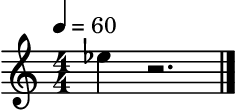

In [4]:
n = Note("5Eb!", 1)
n

Or set `fixed=True`

5Eb:1♩
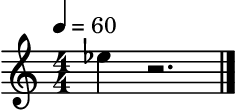

In [5]:
n = Note("5Eb", fixed=True)
n

Actually events can customize the notated pitch in any way, not only as an enharmonic variant. **NB**: this does not change the playback pitch or the pitch value of the note itself

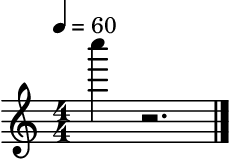

The actual pitch of this note is 5C


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:.piano=501.0003 start=12.225 dur=1.000 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=72 p18=0.515178 p19=1 …)

In [7]:
n = Note("5C", 1)
n.addSymbol(symbols.NotatedPitch('7C'))
n.show()
print(f"The actual pitch of this note is {n.name}")
n.play(instr='.piano')

## Transposition

Notation transposition is used to shift the notated pitches by a given interval. This can be applied to a note, chord, a Chain or a complete Voice

Voice([4C:1♩, 4D:2♩, 4Db:0.5♩, 4F#:0.5♩], offset=0)
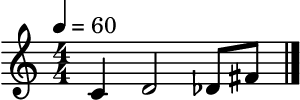

In [8]:
from maelzel.core import *
voice = Voice(r'''
    4C:1; 4D:2; 4Db!:0.5; 4F#!:0.5
''')
voice

Transpositions follows fixed notes

Score(3 voices)
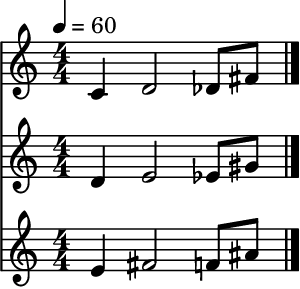

In [9]:
voice2 = voice.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice.copy()
voice3.addSymbol(symbols.Transpose(4))
Score([voice, voice2, voice3])


Here, as a comparison, the same notes without fixed spellings

Score(3 voices)
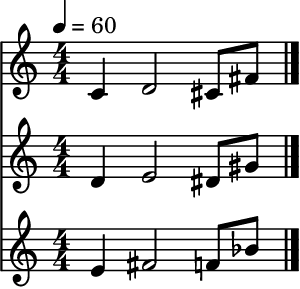

In [10]:
voice = Voice(r'''
    4C:1; 4D:2; 4Db:0.5; 4F#:0.5
''')
voice2 = voice.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice.copy()
voice3.addSymbol(symbols.Transpose(4))
Score([voice, voice2, voice3])


Microtones are also transposed correctly

Score(3 voices)
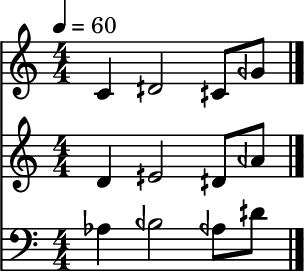

In [11]:
voice = Voice(r'''
    4C:1; 4D+:2; 4Db-:0.5; 4F#+:0.5
''')
voice2 = voice.copy()
voice2.addSymbol(symbols.Transpose(2))
voice3 = voice.copy()
voice3.addSymbol(symbols.Transpose(-4))
Score([voice, voice2, voice3])


## Playback transposition

The opposite: playback transposition only. Here the playback pitch is modified without changing the pitch value of the note or the displayed pitch

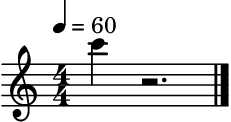

OfflineRenderer(sr=44100)
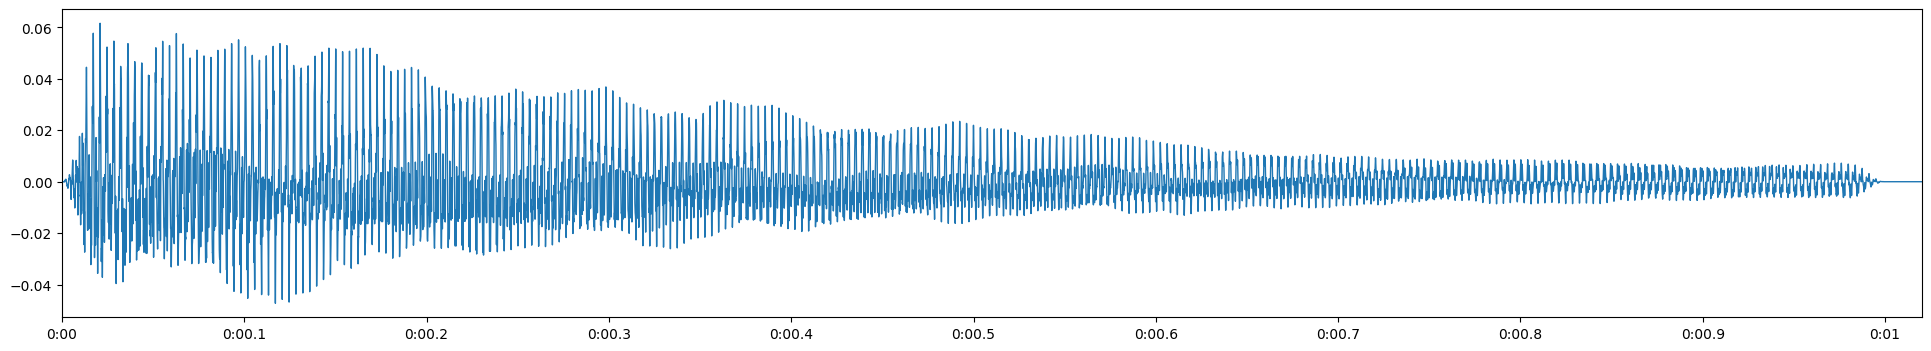

In [15]:
n = Note("6C", 1).setPlay(transpose=-24)
n.show()
n.rec(nchnls=1, instr='.piano')

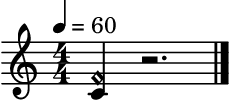

OfflineRenderer(sr=44100)
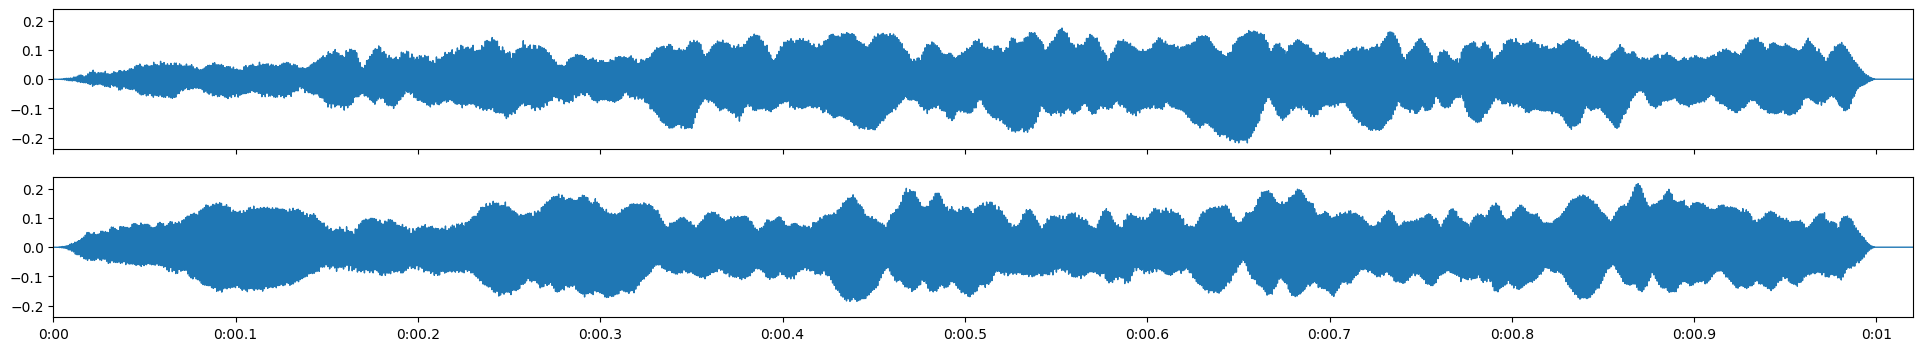

In [17]:
n = Note("4C").addSymbol(symbols.Harmonic('artificial', 5)).setPlay(transpose=24)
n.show()
n.rec(instr='gm-violin')

Chain([4C#:1♩, 4D:0.5♩, 4D#:1♩])
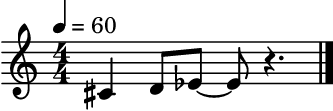

In [18]:
ch = Chain([
    "4C#:1",
    "4D:0.5",
    "4Eb:1"
])
ch

Chain([4F#:1♩, 4G:0.5♩, 4G#:1♩])
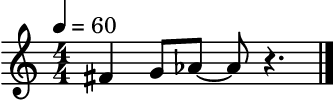

In [19]:
ch.transpose(5)

Chain([4C#:1♩, 4D:0.5♩, 4D#:1♩])
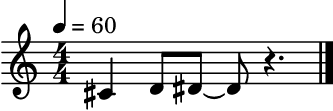

In [20]:
ch = Chain([
    "4C#:1",
    "4D:0.5",
    "4D#!:1"
])
ch

Chain([4F#:1♩, 4G:0.5♩, 4G#:1♩])
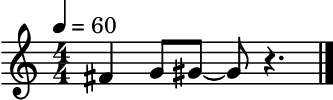

In [21]:
ch.transpose(5)

‹4D 4F 4G 4B 1♩›
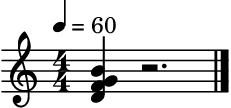

In [25]:
ch = Chord("4D,4F,4G,4B")
ch

‹4D 4F 4G 4B 1♩›
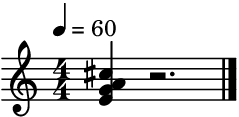

In [26]:
ch2 = ch.copy()
ch2.addSymbol(symbols.Transpose("+2M"))

‹4D 4F 4G# 4B 1♩›
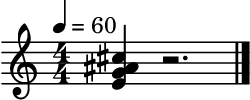

In [27]:
ch =  Chord("4D,4F,4G#!,4B")
ch.addSymbol(symbols.Transpose(2))
ch

Voice([‹4D 4F 4G# 4B 1♩›], offset=0)
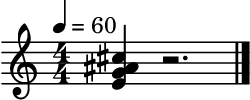

In [29]:
ch =  Chord("4D,4F,4G#!,4B")
v = Voice([ch])
v.addSymbol(symbols.Transpose(2))
v